In [1]:
from lume_lcls_cu_inj_nn.files import EPICS_CONFIG_FILE
from epics import PV, dbr
import click
import time
from functools import partial
from lume_services.models import Model
from lume_services import config


PVNAME_TO_INPUT_MAP = {
    "ACCL:IN20:300:L0A_ADES": "L0A_scale:voltage",
    "ACCL:IN20:400:L0B_PDES": "L0B_phase:dtheta0_deg",
    "ACCL:IN20:300:L0A_PDES": "L0A_phase:dtheta0_deg",
    "QUAD:IN20:122:BACT": "SQ01:b1_gradient",
    "QUAD:IN20:121:BACT": "CQ01:b1_gradient",
    "SOLN:IN20:121:BACT": "SOL1:solenoid_field_scale",
    "BPMS:IN20:221:TMIT": "distgen:total_charge:value",
    "IRIS:LR20:130:CONFG_SEL": "distgen:r_dist:sigma_xy:value"
}

def monitor_callback(parameter_values, pvname, value, **kwargs):
    parameter_values[pvname] = value

In [4]:
global PVNAME_TO_INPUT_MAP

config.configure()
model_db_service = config.context.model_db_service()
scheduling_service = config.context.scheduling_service()

pvs = {}
parameter_values = {
    "distgen:t_dist:length:value" : 7.499772441611215,
    "end_mean_z": 4.6147002,
}

for pvname in PVNAME_TO_INPUT_MAP.keys():
    parameter_values[pvname] = None

model = Model(model_id = 1, deployment_id=1)

for pvname in PVNAME_TO_INPUT_MAP.keys():
    pvs[pvname] = PV(pvname, auto_monitor=dbr.DBE_VALUE)
    pvs[pvname].add_callback(partial(monitor_callback, parameter_values))

print("Evaluating model for:")
print(parameter_values)

Evaluating model for:
{'distgen:t_dist:length:value': 7.499772441611215, 'end_mean_z': 4.6147002, 'ACCL:IN20:300:L0A_ADES': None, 'ACCL:IN20:400:L0B_PDES': None, 'ACCL:IN20:300:L0A_PDES': None, 'QUAD:IN20:122:BACT': None, 'QUAD:IN20:121:BACT': None, 'SOLN:IN20:121:BACT': None, 'BPMS:IN20:221:TMIT': None, 'IRIS:LR20:130:CONFG_SEL': None}


In [35]:
# model.run(
#                     parameters = parameter_values
#                 )
results_df = model.get_results_df()

No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project_name passed to result
No project

In [36]:
print(len(results_df))

151


In [15]:
 print(results_df.columns)

Index(['project_name', 'flow_id', 'distgen:r_dist:sigma_xy:value',
       'distgen:t_dist:length:value', 'distgen:total_charge:value',
       'SOL1:solenoid_field_scale', 'CQ01:b1_gradient', 'SQ01:b1_gradient',
       'L0A_phase:dtheta0_deg', 'L0A_scale:voltage', 'end_mean_z',
       'end_n_particle', 'end_mean_gamma', 'end_sigma_gamma', 'end_mean_x',
       'end_mean_y', 'end_norm_emit_x', 'end_norm_emit_y', 'end_norm_emit_z',
       'end_sigma_x', 'end_sigma_y', 'end_sigma_z', 'end_mean_px',
       'end_mean_py', 'end_mean_pz', 'end_sigma_px', 'end_sigma_py',
       'end_sigma_pz', 'end_higher_order_energy_spread', 'end_cov_x__px',
       'end_cov_y__py', 'end_cov_z__pz', 'x:y', 'out_ymax', 'out_xmax',
       'out_ymin', 'out_xmin', 'date_modified', 'unique_hash',
       'result_type_string'],
      dtype='object')


In [19]:
results_df.iloc[0]

project_name                                                                  local
flow_id                                        5400f371-e209-4153-95b0-fdb8a90b5caa
distgen:r_dist:sigma_xy:value                                              0.137667
distgen:t_dist:length:value                                               12.374625
distgen:total_charge:value                                                  0.00004
SOL1:solenoid_field_scale                                                  0.087426
CQ01:b1_gradient                                                           0.003524
SQ01:b1_gradient                                                           0.003524
L0A_phase:dtheta0_deg                                                       -8.8997
L0A_scale:voltage                                                  70000000000000.0
end_mean_z                                                                   4.6147
end_n_particle                                                          5183

In [ ]:
results_df.iloc[0]

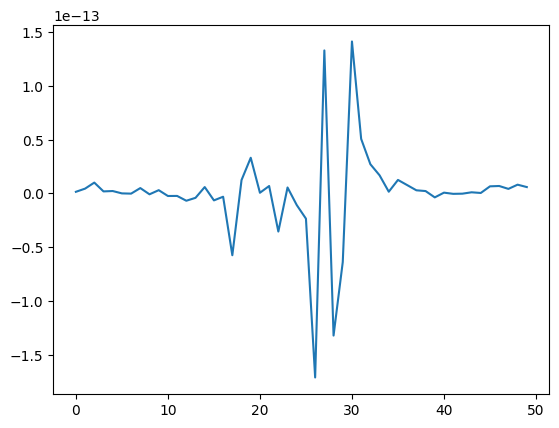

In [22]:
import matplotlib.pyplot as plt
plt.plot(results_df.iloc[0]["x:y"][0])
plt.show()

In [32]:
results_df["end_norm_emit_x"]

0      0.000017
1      0.000017
2      0.000017
3      0.000017
4      0.000017
         ...   
112    0.000017
113    0.000017
114    0.000017
115    0.000017
116    0.000017
Name: end_norm_emit_x, Length: 117, dtype: float64